Files & Exceptional Handling


1. Discuss the scenarios where multithreading is preferable to multiprocessing and scenarios where 
multiprocessing is a better choice.

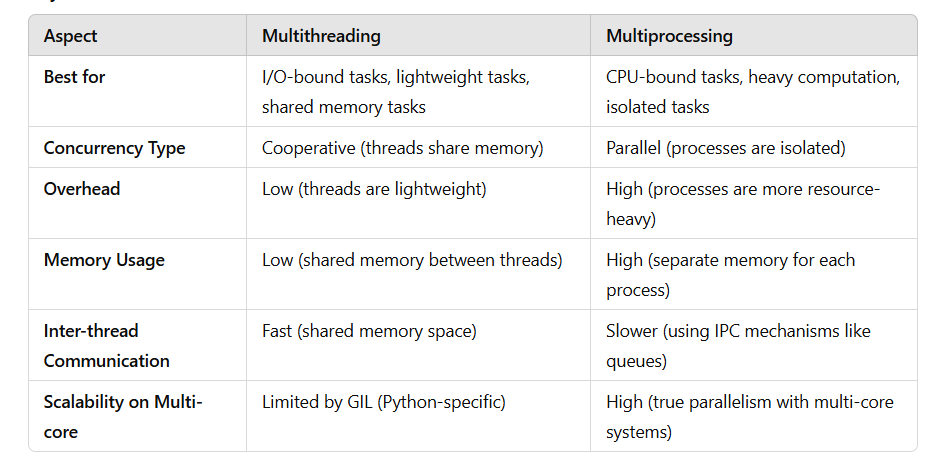

2. Describe what a process pool is and how it helps in managing multiple processes efficiently.

In [7]:
#Process Pool: Definition and Purpose

#A **process pool** is a collection of pre-created, reusable processes that are managed by a pool manager (often referred to as a **process pool manager** or **worker pool**). The process pool allows you to manage multiple processes efficiently by maintaining a fixed number of worker processes that can handle tasks concurrently. This concept is particularly useful when you need to execute many independent, parallel tasks in an environment where process creation and destruction are expensive or time-consuming.

#In Python, a process pool is typically implemented through the **`multiprocessing`** module, which provides a **`Pool`** class that abstracts away much of the complexity of process management.

# How a Process Pool Works

#1. **Initialization**:
 #  - When a process pool is created, a specified number of worker processes are spawned (usually determined by the number of CPU cores available or a user-defined parameter).
   
#2. **Task Assignment**:
 #  - The process pool manager assigns tasks to idle worker processes. When a task is added to the pool (usually via a `map`, `apply`, or `apply_async` method), one of the worker processes from the pool is chosen to execute the task.
   
#3. **Process Reuse**:
 #  - After a worker process completes its assigned task, instead of terminating, it becomes available to handle another task. This reuse of processes helps avoid the overhead of repeatedly creating and destroying processes.
   
#4. **Termination**:
 #  - When all tasks have been processed, the process pool can be terminated. In Python, this is often done by calling the `close()` method to prevent new tasks from being submitted, followed by `join()` to wait for all processes to complete.

# Benefits of Using a Process Pool

#1. **Efficient Resource Management**:
 #  - Creating new processes is an expensive operation in terms of system resources and time. By reusing a fixed set of worker processes, the process pool reduces the overhead of process creation and destruction. This makes the overall task execution more efficient, especially when you have a large number of tasks to execute.

#2. **Avoiding Process Creation Overhead**:
 #  - Without a pool, you might need to create a new process each time a task is ready to be executed, which can be inefficient, particularly for small tasks that need to be performed many times. The process pool abstracts away this issue by maintaining a pool of ready-to-use worker processes.

#3. **Load Balancing**:
 #  - The pool manager ensures that tasks are distributed evenly among available workers, helping to balance the load and improve overall throughput. This can prevent any single worker from becoming overloaded, and ensures that all workers are utilized efficiently.

#4. **Scalability**:
 #  - A process pool can help you scale up the number of tasks handled concurrently by increasing the size of the pool (i.e., the number of worker processes). If your system has many CPU cores, you can create a pool large enough to fully utilize the hardware, achieving true parallelism for CPU-bound tasks.

#5. **Simplified Management**:
 #  - A process pool abstracts away much of the complexity involved in managing individual processes, including handling process creation, termination, and communication between processes. It provides a simple interface for submitting tasks and retrieving results.

#6. **Task Parallelism**:
 #  - With a process pool, you can easily run many tasks in parallel, allowing you to take full advantage of multi-core processors. This is especially beneficial for CPU-bound tasks that can be divided into independent sub-tasks.

# Key Features and Functions of the `multiprocessing.Pool` Class (in Python)

#The **`Pool`** class from Python's `multiprocessing` module provides several key functions that make it easy to manage a pool of worker processes:

#Using a **process pool**:

#- You create a fixed number of worker processes upfront.
#- These workers process multiple data points concurrently, each working on a subset of the data.
#- The pool abstracts the management of processes, distributing tasks and reusing worker processes to handle new tasks as they come.

#This makes the entire process far more efficient, especially for tasks that are CPU-bound and can benefit from parallelism.

# Conclusion

#A **process pool** is a highly effective way to manage multiple processes efficiently, especially when you have many independent tasks that can be run in parallel. It allows for better resource management, reduces the overhead of process creation and termination, and makes it easier to scale applications to utilize all available CPU cores. The use of a pool also provides an abstraction for task distribution and process lifecycle management, making it simpler to handle concurrent processing in Python and other languages that support multiprocessing.

3. Explain what multiprocessing is and why it is used in Python programs.


In [10]:
# What is Multiprocessing?

#**Multiprocessing** refers to the ability of a system to run multiple processes simultaneously, with each process operating independently. A **process** is an independent, self-contained unit of execution that has its own memory space, and can run concurrently with other processes. In Python, **multiprocessing** refers to the module that allows for the creation, management, and communication between processes, enabling concurrent execution of code across multiple CPU cores.

#Unlike **multithreading**, where multiple threads share the same memory space within a single process, **multiprocessing** creates separate processes, each with its own memory and Python interpreter. This means that processes can run truly in parallel, taking advantage of multiple CPU cores, without being affected by Python’s **Global Interpreter Lock (GIL)**.

# Why Use Multiprocessing in Python Programs?

#There are several key reasons why multiprocessing is commonly used in Python programs, especially when you need to perform tasks concurrently:

# 1. **Bypassing the Global Interpreter Lock (GIL)**

#Python, specifically the CPython implementation, has a **Global Interpreter Lock (GIL)**, which is a mutex (lock) that ensures only one thread can execute Python bytecode at a time in a single process. This makes **multithreading** unsuitable for **CPU-bound** tasks because the GIL limits the ability of threads to run concurrently on multiple CPU cores.

#- **Multiprocessing** solves this issue by creating separate processes, each with its own Python interpreter and GIL. This allows for **true parallelism**, enabling Python to fully utilize multiple CPU cores and run CPU-bound tasks in parallel without interference from the GIL.

#*Example**:
#In a CPU-intensive task like image processing or mathematical computations, using multiprocessing can dramatically speed up execution since each process can run on a different core, leveraging multi-core CPUs.

# 2. **Better Performance for CPU-bound Tasks**

#Python’s threading model is great for **I/O-bound** tasks (e.g., waiting for network responses, reading files), but it doesn’t perform well for **CPU-bound** tasks. When working with CPU-bound tasks—where the program is heavily performing computations (like image processing, machine learning, or data analysis)—multiprocessing offers significant performance improvements because it allows the program to use multiple processors or CPU cores.

#- **CPU-bound tasks** include anything that requires significant CPU resources and doesn’t involve waiting on external resources, like mathematical computations, simulations, or rendering large datasets.
  
#- **Example**: If you have a function that processes a large amount of data (e.g., matrix multiplications), splitting the work into smaller tasks and distributing them across multiple processes can speed up the overall computation.

# 3. **Scalability on Multi-core Systems**

#Modern computers typically have **multiple cores** in their CPUs. Multiprocessing in Python allows you to take advantage of these multiple cores by running separate processes in parallel, utilizing each core to its maximum capacity.

#- When you use multiprocessing, Python can spawn as many processes as there are CPU cores (or more, depending on the workload). This **parallelism** leads to faster execution, especially when processing large datasets or performing complex computations.

#**Example**: For a machine learning model training, each core can process a different subset of the data or perform hyperparameter tuning concurrently, leading to faster training times.

# 4. **Isolation and Fault Tolerance**

#Each process in a multiprocessing environment has its own memory space and operates independently. This **isolation** between processes means that if one process encounters an error, it does not affect other processes. This feature is beneficial in scenarios where you want fault tolerance, as a failure in one process doesn’t crash the entire application.

#- **Example**: In a web scraper that fetches data from multiple URLs, if one process encounters a bad URL or network error, the other processes can continue without disruption.

# 5. **Improved Efficiency with Parallelism**

#Many tasks can be split into smaller, independent sub-tasks that can run concurrently. Multiprocessing helps you break down large problems into smaller chunks and process them in parallel, improving the overall efficiency of the program.

#- **Example**: If you have a list of items to process (e.g., a large number of files to analyze), you can use multiprocessing to assign each item to a separate process, so they can be processed concurrently, rather than sequentially.

# 6. **Parallelism for Heavy Computation (Scientific Computing)**

#In fields like **data science**, **machine learning**, and **scientific computing**, tasks like matrix operations, statistical computations, or simulations can be very computationally intensive. Multiprocessing is often used to distribute these computational tasks across multiple processes, thus speeding up execution.

#- **Example**: In **scientific simulations** (such as weather modeling), each simulation run may require heavy calculations. These simulations can be broken down into independent subtasks, each handled by a separate process.

# 7. **Distributed Computing (Clustered Environments)**

#Multiprocessing can also be used to run processes on multiple machines (distributed computing). In a distributed environment, multiple computers (or clusters of machines) can collaborate to process a massive task, breaking the task down into smaller subtasks, and running these subtasks in parallel across different machines.

4. Write a Python program using multithreading where one thread adds numbers to a list, and another 
thread removes numbers from the list. Implement a mechanism to avoid race conditions using 
threading.Lock.

In [6]:
#Sure! Below is a Python program that uses multithreading to add and remove numbers from a shared list. It implements a `threading.Lock` to prevent race conditions and ensure that only one thread can access the shared list at a time.

import threading
import time
import random

shared_list = []
lock = threading.Lock()

def add_numbers():
    for _ in range(5):
        num = random.randint(1, 100)
        time.sleep(random.uniform(0.1, 0.5))  # Simulate some delay
        with lock:
            shared_list.append(num)
            print(f"Added {num} to the list.")
        time.sleep(random.uniform(0.1, 0.5))  # Simulate some delay

def remove_numbers():
    for _ in range(5):
        time.sleep(random.uniform(0.1, 0.5))  # Simulate some delay
        with lock:
            if shared_list:
                num = shared_list.pop(0)
                print(f"Removed {num} from the list.")
            else:
                print("List is empty, nothing to remove.")
        time.sleep(random.uniform(0.1, 0.5))  # Simulate some delay

#add_thread = threading.Thread(target=add_numbers)
#remove_thread = threading.Thread(target=remove_numbers)

# Start the threads
#add_thread.start()
#remove_thread.start()

# Wait for both threads to finish
#add_thread.join()
#remove_thread.join()



# Explanation:
#1. **Shared List**: The `shared_list` is the list where numbers are added and removed by different threads.
#2. **Lock**: The `lock` is a `threading.Lock` that ensures mutual exclusion. When one thread is accessing the list, the other thread will have to wait until the lock is released.
#3. **Add Numbers**: The `add_numbers()` function adds a random number to the list, and it uses `lock` to ensure that no other thread modifies the list simultaneously.
#4. **Remove Numbers**: The `remove_numbers()` function removes a number from the list. It also uses the `lock` to ensure that only one thread removes items at a time.
#5. **Threads**: Two threads are created: one for adding numbers and one for removing them. The threads are started with `start()` and then we wait for both threads to finish with `join()`.

5. Describe the methods and tools available in Python for safely sharing data between threads and 
processes.

In [14]:
#In Python, safely sharing data between threads and processes requires special synchronization mechanisms to avoid race conditions, deadlocks, and other concurrency issues. Below is an overview of the methods and tools available in Python for safely sharing data between threads and processes:

# **1. Threading (for threads)**

#When using threads in Python (with the `threading` module), multiple threads share the same memory space, so data synchronization is crucial to avoid conflicts.

# **Threading Tools for Safe Data Sharing**:

#1. **`threading.Lock`**:
 #  - A `Lock` is the most basic synchronization primitive. It is used to ensure that only one thread can access a shared resource at any given time.
  # - Example usage:
   #  ```python
     import threading
     lock = threading.Lock()
     shared_data = []

     def add_to_list():
         with lock:
             shared_data.append(1)
    

#2. **`threading.RLock`** (Reentrant Lock):
 #  - An `RLock` is similar to a regular lock, but it allows the same thread to acquire the lock multiple times without causing a deadlock.
  # - Useful when the same thread needs to acquire the lock multiple times (e.g., when calling a function that already holds the lock).
   #- Example usage:
    # ```python
     import threading
     rlock = threading.RLock()
     ```

#3. **`threading.Semaphore`**:
 #  - A `Semaphore` controls access to a shared resource by limiting the number of threads that can access the resource simultaneously.
  # - A semaphore starts with a certain number of resources (a count) and allows a thread to acquire a resource if it’s available (i.e., the count is greater than 0).
   #- Example usage:
    # ```python
     import threading
     semaphore = threading.Semaphore(2)  # Allow 2 threads to access the resource at a time
     ```

#4. **`threading.Event`**:
 #  - An `Event` object allows threads to communicate by signaling each other. One thread can set the event, and other threads can wait for it to be set.
  # - Example usage:
   #  ```python
     import threading
     event = threading.Event()
     
     def wait_for_event():
         print("Waiting for event...")
         event.wait()
         print("Event triggered!")
     
     def trigger_event():
         event.set()
     
     threading.Thread(target=wait_for_event).start()
     threading.Thread(target=trigger_event).start()
     ```

#5. **`threading.Condition`**:
 #  - A `Condition` variable is used to coordinate multiple threads. It is often used in producer-consumer scenarios where threads need to wait for certain conditions before proceeding.
  # - Example usage:
   #  ```python
     import threading
     condition = threading.Condition()

     def producer():
         with condition:
             print("Producer producing data")
             condition.notify()

     def consumer():
         with condition:
             print("Consumer waiting for data")
             condition.wait()
             print("Consumer received data")
     
     threading.Thread(target=consumer).start()
     threading.Thread(target=producer).start()
     ```
# **2. Multiprocessing (for processes)**

#For **multiprocessing**, where processes have separate memory spaces, you need inter-process communication (IPC) tools to share data safely between processes. The `multiprocessing` module provides several tools for this purpose.

# **Multiprocessing Tools for Safe Data Sharing**:

#1. **`multiprocessing.Value` and `multiprocessing.Array`**:
 #  - `Value` is used to share a single data value between processes, and `Array` is used to share a sequence of data between processes.
  # - Both are synchronized, meaning only one process can access them at a time, making them thread-safe.
   #- Example usage:
    # ```python
     import multiprocessing

     shared_value = multiprocessing.Value('i', 0)  # 'i' for integer
     shared_array = multiprocessing.Array('i', [1, 2, 3])  # Shared array

     def increment():
         with shared_value.get_lock():  # Ensuring mutual exclusion
             shared_value.value += 1

     def access_array():
         with shared_array.get_lock():
             print(shared_array[:])

#2. **`multiprocessing.Manager`**:
 #  - A `Manager` creates a server process that can hold Python objects (like lists, dictionaries, etc.) and allows safe sharing of these objects between processes.
  # - Managers provide thread-safe and process-safe data structures.
   #- Example usage:
    # ```python
     import multiprocessing

     def worker(shared_list):
         shared_list.append(1)

     if __name__ == "__main__":
         with multiprocessing.Manager() as manager:
             shared_list = manager.list()  # Create a managed list
             processes = [multiprocessing.Process(target=worker, args=(shared_list,)) for _ in range(5)]

             for p in processes:
                 p.start()
             for p in processes:
                 p.join()

             print(shared_list)  # Output will be [1, 1, 1, 1, 1]

#3. **`multiprocessing.Queue`**:
 #  - A `Queue` is a thread-safe and process-safe way to share data between processes. It uses the producer-consumer model, where one process can put data into the queue, and another process can retrieve data from it.
  # - Example usage:
   #  ```python
     import multiprocessing

     def producer(queue):
         for i in range(5):
             queue.put(i)
             print(f"Produced {i}")

     def consumer(queue):
         while True:
             item = queue.get()
             if item is None:  # Sentinel to stop the consumer
                 break
             print(f"Consumed {item}")

     if __name__ == "__main__":
         queue = multiprocessing.Queue()
         p1 = multiprocessing.Process(target=producer, args=(queue,))
         p2 = multiprocessing.Process(target=consumer, args=(queue,))
         p1.start()
         p2.start()
         p1.join()
         queue.put(None)  # Stop signal for consumer
         p2.join()

#4. **`multiprocessing.Pipe`**:
 #  - A `Pipe` is another IPC method for two-way communication between processes. A pipe has two endpoints (sender and receiver), and data can be passed between processes using the pipe.
  # - Example usage:
   #  ```python
     import multiprocessing

     def send_data(conn):
         conn.send("Hello from the sender!")
         conn.close()

     def receive_data(conn):
         msg = conn.recv()
         print(f"Received message: {msg}")
         conn.close()

     if __name__ == "__main__":
         parent_conn, child_conn = multiprocessing.Pipe()
         p1 = multiprocessing.Process(target=send_data, args=(parent_conn,))
         p2 = multiprocessing.Process(target=receive_data, args=(child_conn,))
         p1.start()
         p2.start()
         p1.join()
         p2.join()

# **3. Shared Memory (for both threads and processes)**

#1. **`shared_memory` (introduced in Python 3.8)**:
 #  - The `shared_memory` module allows the sharing of memory buffers between different processes (even on different machines, if configured properly). This allows you to avoid the overhead of copying large data structures.

IndentationError: unexpected indent (337155953.py, line 13)

6. Discuss why it’s crucial to handle exceptions in concurrent programs and the techniques available for 
doing so.

In [17]:
#Handling exceptions in concurrent programs is crucial because when multiple threads or processes run concurrently, errors and failures in one part of the program can affect the entire system. If exceptions are not properly managed, they can lead to unpredictable behavior, deadlocks, resource leaks, data corruption, or even crashes. Effective exception handling ensures that a program remains robust, responsive, and maintains correct behavior even in the face of runtime errors.

#Why Handling Exceptions in Concurrent Programs Is Crucial

#1. Unpredictable Behavior: 
           #In concurrent programs, multiple threads or processes are executing independently and in parallel. An exception in one thread or process can cause it to terminate unexpectedly, and if not handled properly, this can affect other parts of the program or leave shared resources in an inconsistent state
#2. Race Conditions:
           #If exceptions are not managed properly, they can create race conditions where different threads are trying to access shared resources in conflicting ways. For example, if one thread encounters an error while modifying a shared list and another thread tries to access that list, the program could crash or behave unpredictably
#3. Resource Leaks: 
           #Without proper exception handling, resources like memory, file handles, database connections, or network sockets might not be released properly when an error occurs, leading to resource leaks. Over time, this can result in performance degradation or even resource exhaustion
#4. Deadlocks:
           #If an exception occurs while a thread is holding a lock or waiting for another resource, it may leave the system in a deadlock state, where no other threads can proceed because they are waiting on resources that are locked by the failed thread.
#5. Program Termination:
           #In concurrent programs, uncaught exceptions in a thread or process often cause the entire application to terminate if not handled correctly. This is especially problematic in long-running applications or servers that need to stay operational despite individual errors.


7. Create a program that uses a thread pool to calculate the factorial of numbers from 1 to 10 concurrently. 
Use concurrent.futures.ThreadPoolExecutor to manage the threads.

In [20]:
import concurrent.futures
import math

def calculate_factorial(n):
    return math.factorial(n)

def main():
    numbers = list(range(1, 11))  # Numbers from 1 to 10
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(calculate_factorial, numbers)

    for number, result in zip(numbers, results):
        print(f"The factorial of {number} is {result}")

if __name__ == "__main__":
    main()


The factorial of 1 is 1
The factorial of 2 is 2
The factorial of 3 is 6
The factorial of 4 is 24
The factorial of 5 is 120
The factorial of 6 is 720
The factorial of 7 is 5040
The factorial of 8 is 40320
The factorial of 9 is 362880
The factorial of 10 is 3628800


8. Create a Python program that uses multiprocessing.Pool to compute the square of numbers from 1 to 10 in 
parallel. Measure the time taken to perform this computation using a pool of different sizes (e.g., 2, 4, 8 
processes).

In [ ]:
import multiprocessing
import time

def compute_square(n):
    return n * n

def compute_with_pool(pool_size):
    # Numbers from 1 to 10
    numbers = list(range(1, 11))

    start_time = time.time()

    with multiprocessing.Pool(pool_size) as pool:
        results = pool.map(compute_square, numbers)

    end_time = time.time()

    time_taken = end_time - start_time

    print(f"Results with pool size {pool_size}: {results}")
    print(f"Time taken with pool size {pool_size}: {time_taken:.4f} seconds\n")

In [ ]:
def main():
    pool_sizes = [2, 4, 8]  # Different pool sizes to test
    
    for pool_size in pool_sizes:
        compute_with_pool(pool_size)

if __name__ == "__main__":
    main()